In [296]:
import matplotlib.pyplot as plt
import numpy as np


In [297]:
f0 = 980
f1 = 1180
Vmod = 300
Vinf = 300
E = 1 / 600
T = 1 / Vmod
m = T * Vinf
q = int (2 ** m)
Td = 1 / (2 * 2 * np.pi * f1)


In [298]:
cos_f0 = lambda t: np.cos(2 * np.pi * f0 * t) * np.cos(2 * np.pi * f0 * t)
cos_f1 = lambda t: np.cos(2 * np.pi * f1 * t) * np.cos(2 * np.pi * f1 * t)

In [299]:
def numerical_integral(f, a, b, dx):
    sum = 0
    previous = a
    next = a + dx
    while next < b:
        sum += (f(previous) + f(next)) * dx / 2
        previous += dx
        next += dx
    return sum

A = 1.0
E = 0.0016666666666666668
E_integral_f0 = 0.0016582041306834828
E_integral_f1 = 0.0016389054599033196


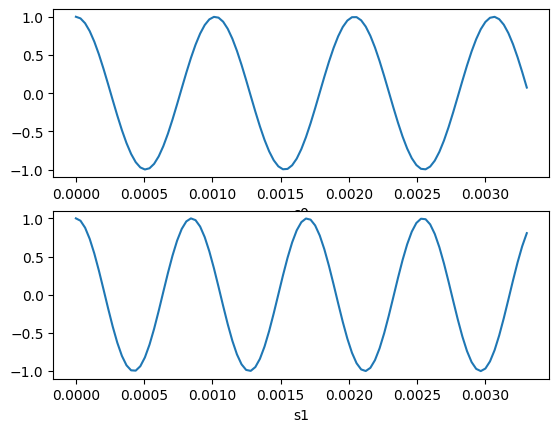

In [300]:
print("A =", np.sqrt(2 * E / T))
print("E =", E)
print("E_integral_f0 =", numerical_integral(cos_f0, 0, T, 0.00001))
print("E_integral_f1 =", numerical_integral(cos_f1, 0, T, 0.00001))

t = np.arange(0, T, Td / 2)
# t = np.arange(0, T, Td * 2)
s0 = np.sqrt(2 * E / T) * np.cos(2 * np.pi * f0 * t)
s1 = np.sqrt(2 * E / T) * np.cos(2 * np.pi * f1 * t)

plt.subplot(2, 1, 1)
plt.xlabel('s0')
plt.plot(t, s0)
plt.subplot(2, 1, 2)
plt.xlabel('s1')
plt.plot(t, s1)
plt.show()


In [301]:
x = np.linspace(0 , q - 1, q)
y1 = []
y2 = []
# for i in x:
#     y1.append(numerical_integral(cos_f0, 0, T, 0.00001))
#     y2.append(E)
y1.append(numerical_integral(cos_f0, 0, T, 0.00001))
y1.append(numerical_integral(cos_f1, 0, T, 0.00001))
y2.append(E)
y2.append(E)

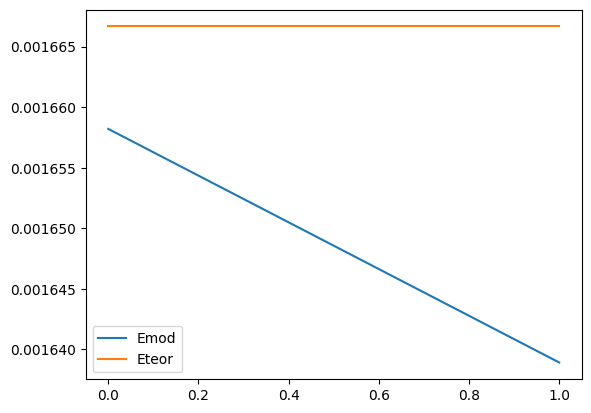

In [302]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Emod", "Eteor"])
plt.show()